In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
symbol = 'AAPL'
data = yf.download(symbol, start='2015-01-01', end='2024-01-01')


[*********************100%***********************]  1 of 1 completed


In [ ]:
prices = data['Close'].values


In [ ]:
#normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
prices_scaled = scaler.fit_transform(prices.reshape(-1,1))

In [ ]:
#prepare the dataset for trainimg (predict the next day)
def prepare_data(data, time_steps=10):
  X,y = [],[]
  for i in range(len(data)-time_steps):
    X.append(data[i:i+time_steps, 0]) #input previous data
    y.append(data[i+time_steps, 0])
  return np.array(X), np.array(y)

In [ ]:
time_steps = 10
X, y = prepare_data(prices_scaled, time_steps)

In [ ]:
X, y = prepare_data(prices_scaled, time_steps)

In [ ]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# split the data into training and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# define the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(time_steps, 1)))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

In [ ]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
# make predictions
predictions = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


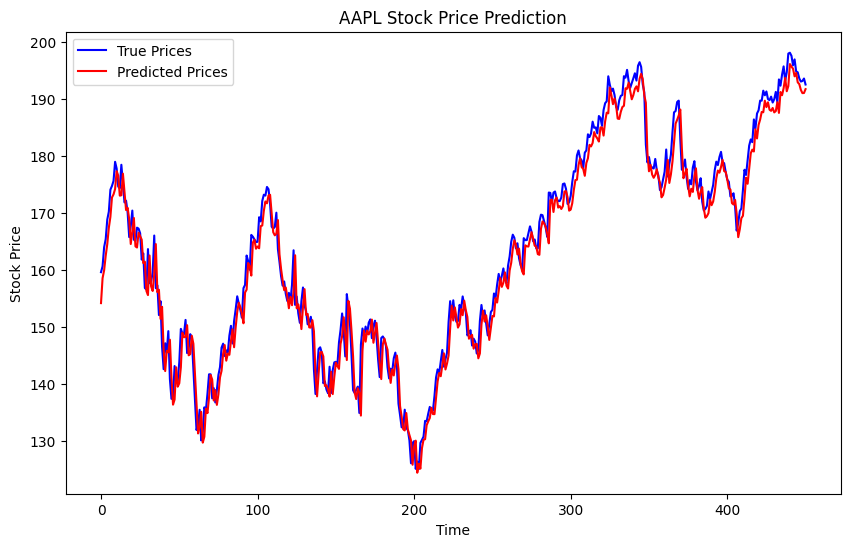

In [ ]:
# Invert scaling to get the original price values
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot original vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='True Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

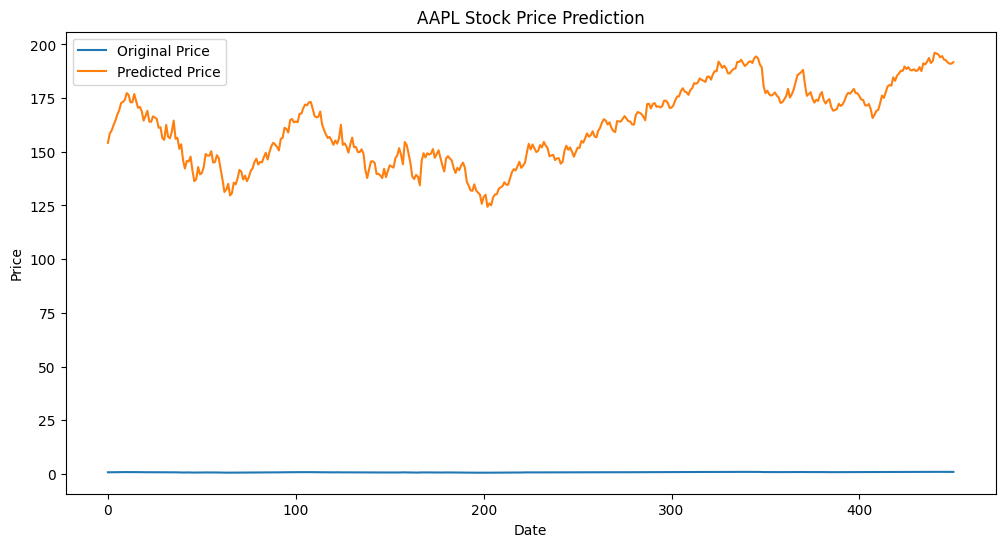

In [ ]:
# plot original vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Original Price')
plt.plot(predictions, label='Predicted Price')
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
#